1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

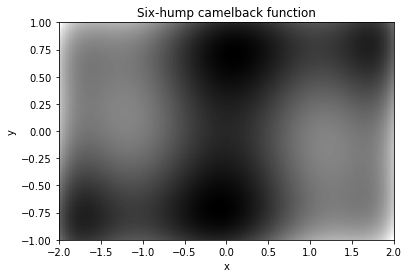

Solutions are:

f( [-0.08984141  0.71265608] ) =  -1.0316284534877955
f( [-0.08984207  0.71265639] ) =  -1.031628453489864

Starting from (0,0), solutions are:

f( [0. 0.] ) =  0.0
The result is wrong because (0,0) is not a global minima


In [6]:
import scipy.optimize as optimize
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def function(value):
    [x, y] = value
    return (4-2.1*(x**2)+(x**4)/3)*(x**2)+x*y+(4*(y**2)-4)*(y**2)

x = np.linspace(-2,2, 100)
y = np.linspace(-1,1, 100)
x,y = np.meshgrid(x,y)

fig, ax = plt.subplots()
value = (x,y)
pos = ax.imshow(function(value),  extent=[-2,2,-1,1], cmap='gray', aspect = 'auto')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Six-hump camelback function')
plt.show()

starts = [(-2,2), (-1,1)]

print("Solutions are:\n")
for point in starts:
    solution = optimize.minimize(function, point)
    if solution.success:
        print('f(',solution.x,') = ', function(solution.x))

#this is what happens if i start from (0,0)
print("\nStarting from (0,0), solutions are:\n")
solution = optimize.minimize(function, (0, 0))
if solution.success:
    print('f(',solution.x,') = ', function(solution.x))
    
print("The result is wrong because (0,0) is not a global minima")

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

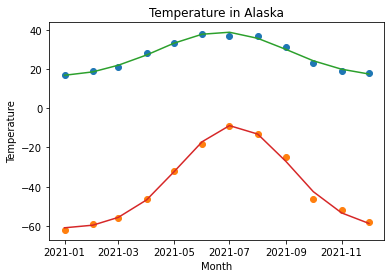

Considering the fact that we pick temperatures during a year, 
in this case the gaussian function, with due adjustments, will fit with our data.


In [7]:

t_max = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
t_min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig, ax = plt.subplots()
ax.set_title('Temperature in Alaska')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
dates= pd.date_range('2021-01-01','2022-01-01' , freq='m')-pd.offsets.MonthBegin(1)
dates_prime = []
for d in dates:
    delta = d - dates[0]
    dates_prime += [delta.days +1, ]
ax.plot(dates, t_max, 'o')
ax.plot(dates, t_min, 'o')

#formula gaussiana = ae ^ -[(x-b)^2 / c^2]
def gaussian(x, a, b ,c, d):
    return a*np.exp(-((x-b)**2/(c**2)))+d

#values to optimize
max_temp = optimize.curve_fit(gaussian, np.arange(12), t_max, p0 = [10, 1, 10, 1], maxfev = 1000000)
min_temp = optimize.curve_fit(gaussian, np.arange(12), t_min, p0 = [10, 1, 10, 1], maxfev = 1000000)

#gaussiana maximum values
x_max = (12*np.arange(len(dates))/len(dates))
a_max = (max_temp[0])[0]
b_max = (max_temp[0])[1]
c_max = (max_temp[0])[2]
d_max = (max_temp[0])[3]

#gaussiana minimum values
x_min = (12*np.arange(len(dates))/len(dates))
a_min = (min_temp[0])[0]
b_min = (min_temp[0])[1]
c_min = (min_temp[0])[2]
d_min = (min_temp[0])[3]

ax.plot(dates, gaussian(x_max, a_max, b_max, c_max, d_max))
ax.plot(dates, gaussian(x_min, a_min, b_min, c_min, d_min))
plt.show()

print("Considering the fact that we pick temperatures during a year, \nin this case the gaussian function, with due adjustments, will fit with our data.")

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

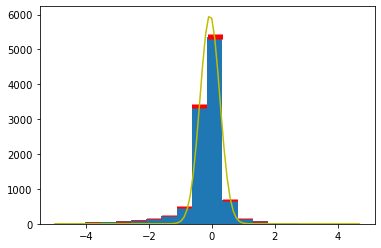

n degrees of freedom = 19
chi2 = 13859.400035557564
p-value = 0.0 --> fit is unsatisfactory


In [8]:
import pickle

filename = 'residuals_261.pkl'
s = open(filename, 'rb') #rb read in binary form
new_dict = pickle.load(s)
s.close

#Histogram
a = np.load(filename, allow_pickle = True).item()
df = pd.DataFrame(a)
df = df[df['residuals']>-5] 
df = df[df['residuals']<5] #to have a better view of the graph
data = df['residuals'] 
fig, ax = plt.subplots()
y, edges, _ = ax.hist(data, bins = 20, ) # su y metto i valori delle bins

#Poisson uncertainty ( si = radice di(ni)dove ni è il numero di entries nel bin i-esimo)
bincenters = 0.5*(edges[1:] + edges[:-1])
yerr = np.sqrt(np.abs(y))
ax.errorbar(bincenters, y, yerr, fmt='none',c='red', linewidth=15, capsize=0, barsabove=True)

#an appropriate function to fit the residuals could be a gaussian function
def gaussiana(x, scale, mean ,sigma):
    return scale*np.exp(-((x-mean)**2/(sigma**2)))

fit = optimize.curve_fit(gaussiana, bincenters, y, p0 = [1,1,1], maxfev=1000000)
x = np.linspace(edges[0], edges[-1], 100)
scale, mean, sigma = (fit[0])[0], (fit[0])[1], (fit[0])[2]
ax.plot(x, gaussiana(x, scale, mean, sigma), 'y')
plt.show()

#Goodness-of-Fit test: check satisfaction of p-values
#will follow lecture 08 method
ndof = len(bincenters) - 1
print("n degrees of freedom =", ndof)
# calculate the chi^2
chi2 = np.sum(((y - gaussiana(bincenters, scale, mean, sigma))**2) / yerr)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)

# if the p-value is < 0.05, the fit is considered unsatisfactory")
if (pvalue<0.5):
    print("p-value =", pvalue, "--> fit is unsatisfactory")
else:
    print("p-value=", pvalue, "--> fit is satisfactory")



4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

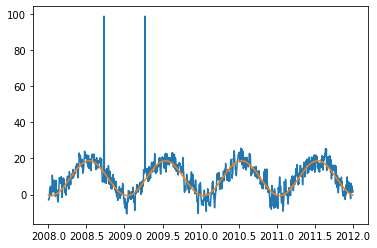

Best fit values:
f(x) = -9.67 cos(2πx 12.3) + 9.05
Average Temperature = 8.94190703859861
Coldest Predicted Temperature = -0.6187147273632991
Hottest Predicted Temperature = 18.723838889944965
Parameter b shifts the function horizontally, it stands for the initial phase of the cosine function

Fisher test:
CL: 0.634 , additional parameter necessary: NO


In [9]:
from scipy.stats import f

#PLOT TEMPERATURES FROM 2008 TO 2012
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', header=None, sep=' ', names=['Year', 'Temperature'])
fig, ax = plt.subplots()
ax.plot('Year', 'Temperature', data = data[(data['Year']>2008) & (data['Year']<2012)])

#FIRST FORMULA FOR COSINE
def f(x,a,b,c):
    return a*np.cos(2*np.pi*x + b) + c

fit, cov = optimize.curve_fit(f, data['Year'], data['Temperature'], p0 = [1,1,1], full_output=False)
a, b, c = fit[0], fit[1], fit[2]
data['Interpolation_f'] = f(data['Year'], a, b, c)
ax.plot('Year', 'Interpolation_f', data= data[(data['Year']>2008) & (data['Year']<2012)])
plt.show()

#BEST-FIT VALUES
print('Best fit values:\nf(x) = {:.3} cos(2\u03C0x {:.3}) + {:.3}'.format(a,b,c))
#AVERAGE TEMPERATURES, COLDEST, HOTTEST
print('Average Temperature =', data['Temperature'].mean())
print('Coldest Predicted Temperature =', c+a)
print('Hottest Predicted Temperature =', c-a)
#MEANING OF PARAMETER B
print('Parameter b shifts the function horizontally, it stands for the initial phase of the cosine function')

#SECOND FORMULA FOR COSINE
def g(x,a,b,c,d):
    return a*np.cos(2*np.pi*x*b +c)+d

#RSS for f(x) and g(x)
fit, cov = optimize.curve_fit(g, data['Year'], data['Temperature'], p0 = [1, 1, 1, 1], full_output=False)
a, b, c, d = fit[0], fit[1], fit[2], fit[3]
data['Interpolation_g']=g(data['Year'], a, b, c, d)

#will use function from lecture 08
def Ftest(ssr_f, ssr_g, ndof_f, ndof_g, nbins, verbose=False):
    F = ((ssr_f - ssr_g)/(ndof_g - ndof_f)) / (ssr_g/(nbins - ndof_g))
    CL = 1. - stats.f.cdf(F, ndof_g - ndof_f, nbins - ndof_g)
    if verbose: print("CL: %.3f" % CL,", additional parameter necessary:", "YES" if CL < 0.10 else"NO")
    return CL

ssr_1 = np.sum((data['Temperature']-data['Interpolation_f'])**2)
ssr_2 = np.sum((data['Temperature']-data['Interpolation_g'])**2)
print('\nFisher test:')
cl = Ftest(ssr_1, ssr_2, 3, 4, len(data.index), verbose=True)
